In [2]:
import sys
sys.path.append("../../../")

## 数据

In [3]:
from pylib.utils.functions_for_regression import lin_data, plot_scatter
import matplotlib.pyplot as plt

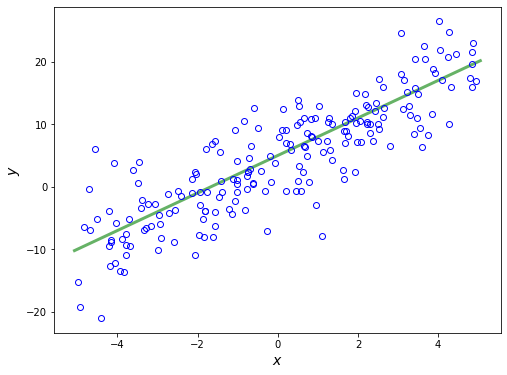

In [4]:
x, y, _, f_truth = lin_data(200)
plt.figure(figsize=(8, 6))
plot_scatter(x, y, f=f_truth)
plt.show()

## 线性回归

In [19]:
from pylib.utils.functions_for_regression import plot_fitted_line
from sklearn.metrics import mean_squared_error
import numpy as np
import ipyvolume.pylab as plt3d

###  均方差损失函数

In [6]:
def mean_squared_loss(X, W, y):
    y_pred = X @ W
    return np.sum((y - y_pred)**2) / len(y)

In [7]:
def negative_gradient(X, W, y):
    grad = -2 / len(y) * X.T @ (y - X @ W) 
    return -grad

### 梯度下降

In [8]:
def gradient_descent(X, y, learning_rate=0.1, epochs=200, random_state=None):
    np.random.seed(random_state)
    p = X.shape[1]
    W = np.random.randn(p) # 随机初始化权重
    weight_history = [W.copy()]
    loss = mean_squared_loss(X, W, y)
    loss_history = [loss]
    tol = 1e-8
    for e in range(1, epochs+1):
        if e == 1 or e % 10 == 0:
            print("Epoch {}: mse={}".format(e, loss))
        neg_grad = negative_gradient(X, W, y)
        W += learning_rate * neg_grad # 更新权重
        weight_history.append(W.copy())
        weight_change = np.sum(np.abs(np.abs(weight_history[-1]) - \
                                      np.abs(weight_history[-2])))
        if weight_change < tol:
            break
        loss = mean_squared_loss(X, W, y)
        loss_history.append(loss)
        
    return weight_history, loss_history

In [9]:
learning_rate = 0.1
epochs = 100
X = np.c_[np.ones(len(x)), x]
weight_history, loss_history = gradient_descent(X, y, learning_rate, 
                                                epochs, random_state=42)

Epoch 1: mse=107.6273249029351
Epoch 10: mse=22.937149282958853
Epoch 20: mse=22.669126421691793
Epoch 30: mse=22.666033697187924
Epoch 40: mse=22.66599800902731
Epoch 50: mse=22.665997597207635
Epoch 60: mse=22.665997592455483
Epoch 70: mse=22.665997592400643
Epoch 80: mse=22.665997592400007


In [10]:
# 系数
W = weight_history[-1]
W

array([4.39205944, 2.987287  ])

### 成本函数历史

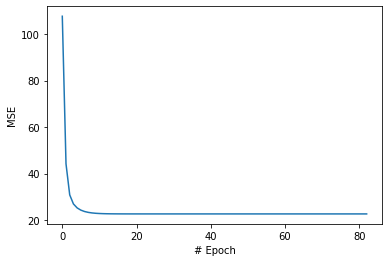

In [11]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.show()

### 参数空间与优化路径

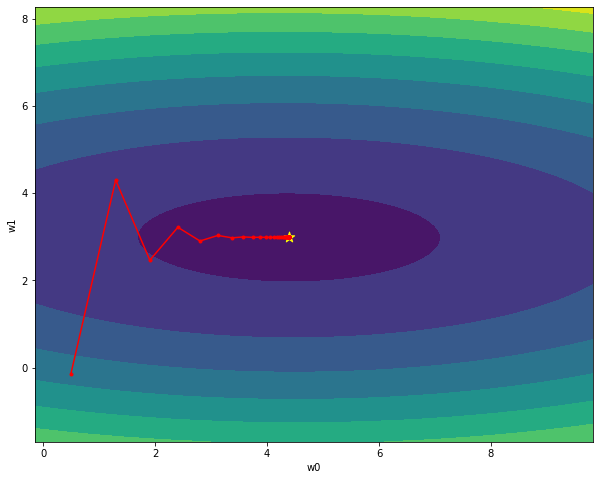

In [12]:
max_interval = np.abs(np.max(weight_history) - np.min(weight_history))
w0n_min = W[0] - max_interval
w0n_max = W[0] + max_interval
w1n_min = W[1] - max_interval
w1n_max = W[1] + max_interval
w0n = 1.1 * np.linspace(w0n_min, w0n_max, 150)
w1n = 1.1 * np.linspace(w1n_min, w1n_max, 150)
ww0n, ww1n = np.meshgrid(w0n, w1n)
Wn = np.c_[ww0n.ravel(), ww1n.ravel()]
lossn = np.array([mean_squared_loss(X, W, y) for W in Wn]).reshape(ww0n.shape)
w0_path = np.array([w[0] for w in weight_history])
w1_path = np.array([w[1] for w in weight_history])

plt.figure(figsize=(10, 8))
plt.contourf(ww0n, ww1n, lossn)
plt.plot(w0_path, w1_path, ".-", c='r')
plt.scatter(W[0], W[1], c='yellow', marker='*', s=120)
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

In [13]:
plt3d.figure(width=1000, height=500)
plt3d.plot_surface(ww0n, lossn, ww1n, color="green")
plt3d.scatter(w0_path.ravel(), np.array(loss_history).ravel(), w1_path.ravel(),
              marker='sphere', size=1.5)
plt3d.plot(w0_path.ravel(), np.array(loss_history).ravel(), w1_path.ravel())
plt3d.scatter(np.array([W[0]]), np.array([loss_history[-1]]), np.array([W[1]]), 
              color='yellow', size=3)
plt3d.xlabel("w0")
plt3d.zlabel("w1")
plt3d.ylabel("mse")
plt3d.show()

### 拟合线

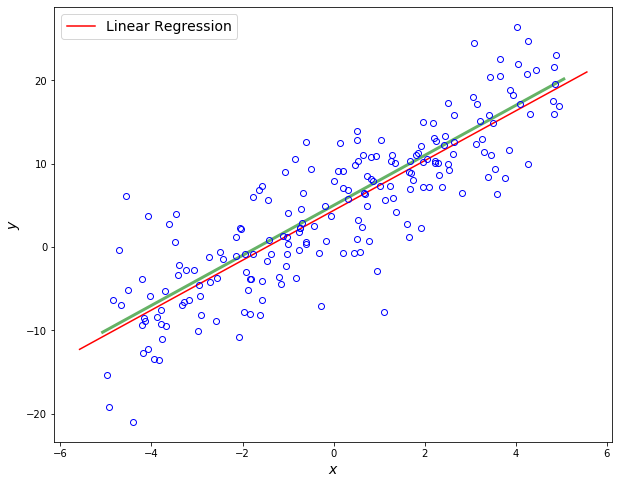

In [14]:
plt.figure(figsize=(10, 8))
plot_scatter(x, y, f=f_truth)
xn = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
yn = W[0] + W[1] * xn
plt.plot(xn, yn, "r", label="Linear Regression")
plt.legend(fontsize=14)
plt.show()

### 投影矩阵

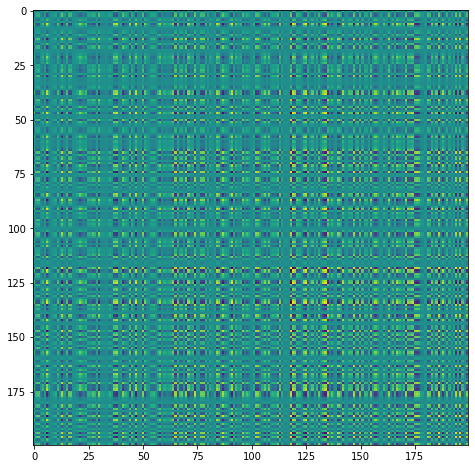

In [15]:
H = X @ np.linalg.inv(X.T @ X) @ X.T

plt.figure(figsize=(8, 8))
plt.imshow(H)
plt.show()

### 自由度

In [16]:
df = np.trace(H)
df

2.0000000000000004

### 对输入矩阵进行SVD分解

In [21]:
U, s, Vh = np.linalg.svd(X, full_matrices=False)

In [22]:
y_pred = U @ U.T @ y
err = mean_squared_error(y, y_pred)
print("样本误差: {:.3f}".format(err)) # 均方差

样本误差: 22.666
